<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Titanic Classification</h3>
</div>

## Importing the libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
import warnings
warnings.filterwarnings("ignore")

## Load and Prepare Data

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df.shape

(891, 12)

In [9]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [11]:
# 1. Count of males and females
gender_counts = df['Sex'].value_counts()
gender_counts

Sex
male      577
female    314
Name: count, dtype: int64

In [12]:
# 2. Survival status for males and females
survival_gender = df.groupby(['Sex', 'Survived']).size().unstack()
survival_gender

Survived,0,1
Sex,,
female,81,233
male,468,109


In [13]:
# 3. Count based on Pclass and survival rate
pclass_survival = df.groupby(['Pclass', 'Survived']).size().unstack()
pclass_survival

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [14]:
# Grouping by 'Embarked' and 'Survived' without plotting
embarked_survival_counts = df.groupby(['Embarked', 'Survived']).size().unstack()
embarked_survival_counts

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,217


In [15]:
# Male survival rates by Pclass
male_pclass_survival = df[df['Sex'] == 'male'].groupby(['Pclass', 'Survived']).size().unstack()
male_pclass_survival

Survived,0,1
Pclass,,
1,77,45
2,91,17
3,300,47


In [16]:
# Female survival rates by Pclass
female_pclass_survival = df[df['Sex'] == 'female'].groupby(['Pclass', 'Survived']).size().unstack()
female_pclass_survival

Survived,0,1
Pclass,,
1,3,91
2,6,70
3,72,72


In [17]:
age_bins = pd.cut(df['Age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90], right=False)
age_survival_counts = df.groupby([age_bins, 'Survived']).size().unstack()
age_survival_counts

Survived,0,1
Age,,
"[0, 10)",24,38
"[10, 20)",61,41
"[20, 30)",143,77
"[30, 40)",94,73
"[40, 50)",55,34
"[50, 60)",28,20
"[60, 70)",13,6
"[70, 80)",6,0
"[80, 90)",0,1


In [18]:
# Grouping by 'SibSp' (siblings/spouses aboard) and 'Survived'
sibsp_survival = df.groupby(['SibSp', 'Survived']).size().unstack()
sibsp_survival

Survived,0,1
SibSp,,
0,398.0,210.0
1,97.0,112.0
2,15.0,13.0
3,12.0,4.0
4,15.0,3.0
5,5.0,NaN
8,7.0,NaN


In [19]:
# Grouping by 'Parch' (parents/children aboard) and 'Survived'
parch_survival = df.groupby(['Parch', 'Survived']).size().unstack()
parch_survival

Survived,0,1
Parch,,
0,445.0,233.0
1,53.0,65.0
2,40.0,40.0
3,2.0,3.0
4,4.0,NaN
5,4.0,1.0
6,1.0,NaN


## Data Preprocessing

In [20]:
missing_summary = df.isnull().sum()
missing_summary[missing_summary > 0]

Age         177
Cabin       687
Embarked      2
dtype: int64

#### The dataset has missing values in three columns:

* Age: 177 missing values
* Cabin: 687 missing values
* Embarked: 2 missing values
##### Here's a recommended approach to handle these missing values:

* Age: Since age is likely an important feature and 177 values are missing, filling in the mean or median age can be reasonable, as it minimizes bias in most datasets. However, if age is critical for predictions, a more complex method like regression or k-nearest neighbors imputation could be used. Here, I’ll use the median to avoid skewing from any outliers.

* Cabin: With a high number of missing values (687 out of total), filling this feature is challenging without significant assumptions. Dropping this column may be practical if cabin information is not crucial for analysis. If needed, it could be imputed with a placeholder (e.g., 'Unknown').

* Embarked: Since only 2 values are missing, filling them with the mode (most frequent port of embarkation) is straightforward and likely won’t skew the results.

In [21]:
# For 'Age', fill missing values with the median age
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [22]:
# For 'Embarked', fill missing values with the mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [23]:
df.drop(columns=['Cabin'], inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [24]:
missing_summary_after = df.isnull().sum()
missing_summary_after[missing_summary_after > 0]

Series([], dtype: int64)

In [25]:
type(df)

pandas.core.frame.DataFrame

In [26]:
df.drop(columns=['PassengerId'], inplace=True)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [27]:
df.drop(columns=['Name'], inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S


In [28]:
df.drop(columns=['Ticket'], inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [30]:
print(df['Sex'].unique())

['male' 'female']


In [31]:
df['male'] = (df['Sex'] == 'male').astype(int)
df['female'] = (df['Sex'] == 'female').astype(int)

In [32]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,female
0,0,3,male,22.0,1,0,7.2500,S,1,0
1,1,1,female,38.0,1,0,71.2833,C,0,1
2,1,3,female,26.0,0,0,7.9250,S,0,1
3,1,1,female,35.0,1,0,53.1000,S,0,1
4,0,3,male,35.0,0,0,8.0500,S,1,0


In [33]:
# Drop the original 'Sex' column
df.drop(columns=['Sex'], inplace=True)

In [34]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,male,female
0,0,3,22.0,1,0,7.2500,S,1,0
1,1,1,38.0,1,0,71.2833,C,0,1
2,1,3,26.0,0,0,7.9250,S,0,1
3,1,1,35.0,1,0,53.1000,S,0,1
4,0,3,35.0,0,0,8.0500,S,1,0


In [35]:
# Basic approach to create columns for 'Embarked' with 0 and 1 values manually
df['C'] = (df['Embarked'] == 'C').astype(int)
df['Q'] = (df['Embarked'] == 'Q').astype(int)
df['S'] = (df['Embarked'] == 'S').astype(int)

In [36]:
# Drop the original 'Embarked' column
df.drop(columns=['Embarked'], inplace=True)

In [37]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,female,C,Q,S
0,0,3,22.0,1,0,7.2500,1,0,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,1,0,0
2,1,3,26.0,0,0,7.9250,0,1,0,0,1
3,1,1,35.0,1,0,53.1000,0,1,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,0,0,1


## Strorytelling - Visualization

#### Overall Survival Rate
Displaying the percentage of people who survived versus those who perished provides an overview of the data and the severity of the situation.

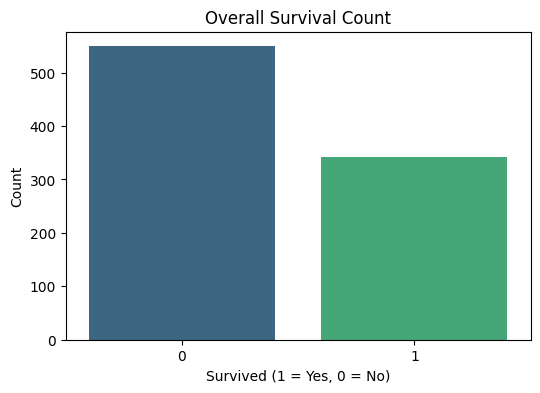

In [38]:
# 1. Overall Survival Rate
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=df, palette='viridis')
plt.title("Overall Survival Count")
plt.xlabel("Survived (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.show()

#### Survival Rate by Passenger Class (Pclass)
Comparing survival rates across different classes (1, 2, and 3) reveals the significance of class level in survival and offers insight into the impact of economic status at that time.

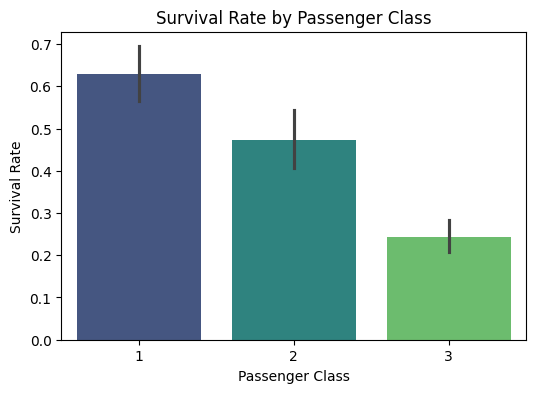

In [39]:
# 2. Survival Rate by Passenger Class (Pclass)
plt.figure(figsize=(6, 4))
sns.barplot(x='Pclass', y='Survived', data=df, estimator=lambda x: sum(x) / len(x), palette='viridis')
plt.title("Survival Rate by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.show()

#### Gender Survival Rate
This analysis highlights the difference in survival rates between men and women, clarifying the role gender played in survival outcomes.

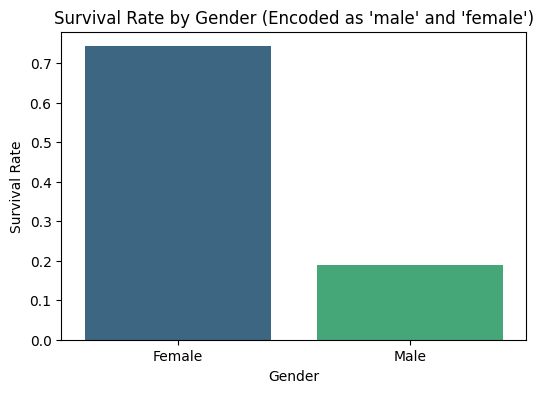

In [40]:
# 3. Survival Rate by Gender (using 'male' and 'female' columns)
plt.figure(figsize=(6, 4))
gender_survival = df[['male', 'Survived']].groupby('male').mean().reset_index()
gender_survival['Gender'] = gender_survival['male'].map({0: 'Female', 1: 'Male'})
sns.barplot(x='Gender', y='Survived', data=gender_survival, palette='viridis')
plt.title("Survival Rate by Gender (Encoded as 'male' and 'female')")
plt.xlabel("Gender")
plt.ylabel("Survival Rate")
plt.show()

#### Age vs. Survival Rate
This chart shows whether children had a higher survival rate than adults, helping to understand the impact of age on survival.

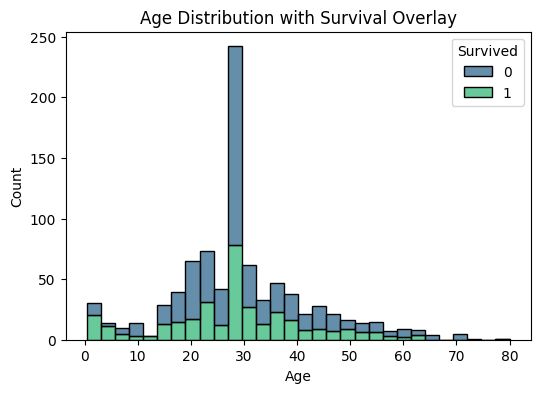

In [41]:
# 4. Age Distribution with Survival Overlay
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='Age', hue='Survived', multiple="stack", palette='viridis', kde=False, bins=30)
plt.title("Age Distribution with Survival Overlay")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

#### Class and Gender Combined Survival Rate
Combining class and gender data can identify which groups had the highest chance of survival and whether class and gender had a combined effect.

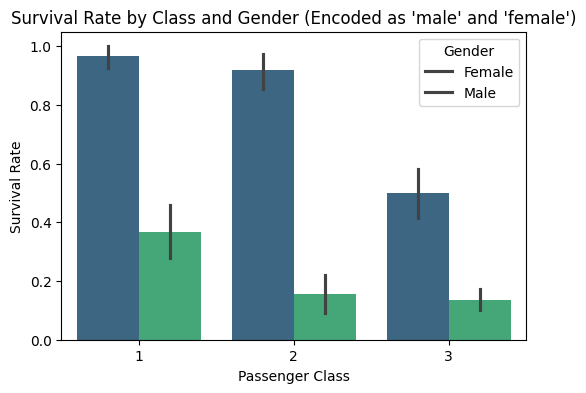

In [42]:
# 5. Survival Rate by Class and Gender (using 'male' and 'female' columns)
plt.figure(figsize=(6, 4))
sns.barplot(x='Pclass', y='Survived', hue='male', data=df, estimator=lambda x: sum(x) / len(x), palette='viridis')
plt.title("Survival Rate by Class and Gender (Encoded as 'male' and 'female')")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.legend(title="Gender", labels=["Female", "Male"])
plt.show()

#### Fare Distribution
This chart can illustrate if passengers with higher-priced tickets had a better chance of survival, shedding light on economic disparities.

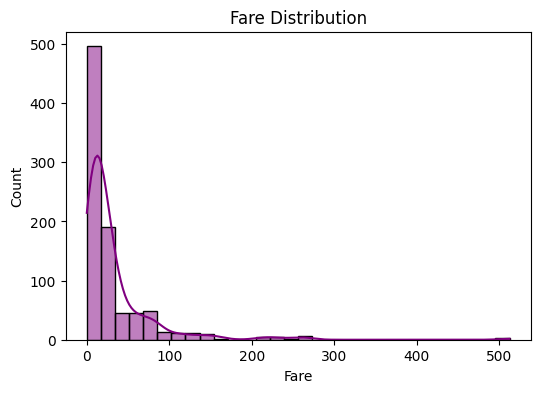

In [43]:
# 6. Fare Distribution
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='Fare', bins=30, kde=True, color='purple')
plt.title("Fare Distribution")
plt.xlabel("Fare")
plt.ylabel("Count")
plt.show()

#### Age vs. Survival Rate

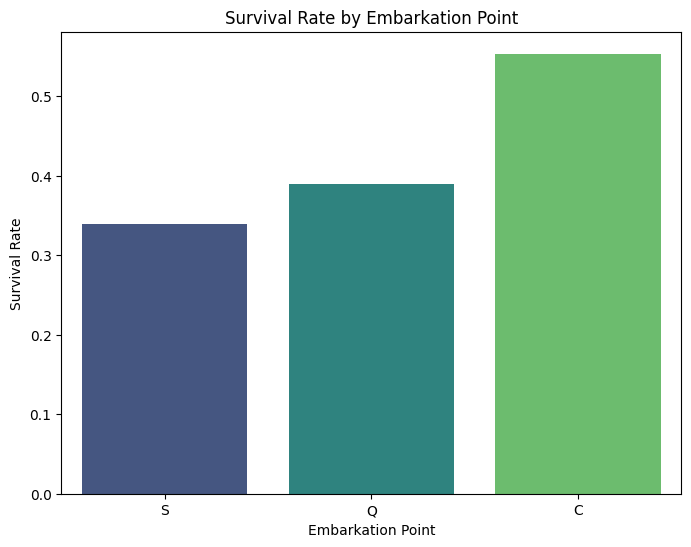

In [44]:
plt.figure(figsize=(8, 6))
embarked_survival = df[['C', 'Q', 'S', 'Survived']].groupby(['C', 'Q', 'S']).mean().reset_index()

# Since each row in embarked_survival has only one '1' in the columns C, Q, or S,
# we can plot them individually to show survival rates by embarkation point
# Mapping values to labels for each embarkation point for clarity in visualization
embarked_survival['Embarked'] = embarked_survival.apply(lambda row: 'C' if row['C'] == 1 else ('Q' if row['Q'] == 1 else 'S'), axis=1)

sns.barplot(x='Embarked', y='Survived', data=embarked_survival, palette='viridis')
plt.title("Survival Rate by Embarkation Point")
plt.xlabel("Embarkation Point")
plt.ylabel("Survival Rate")
plt.show()

## Train your model (Classification)

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

#### Step 1: Display correlation matrix

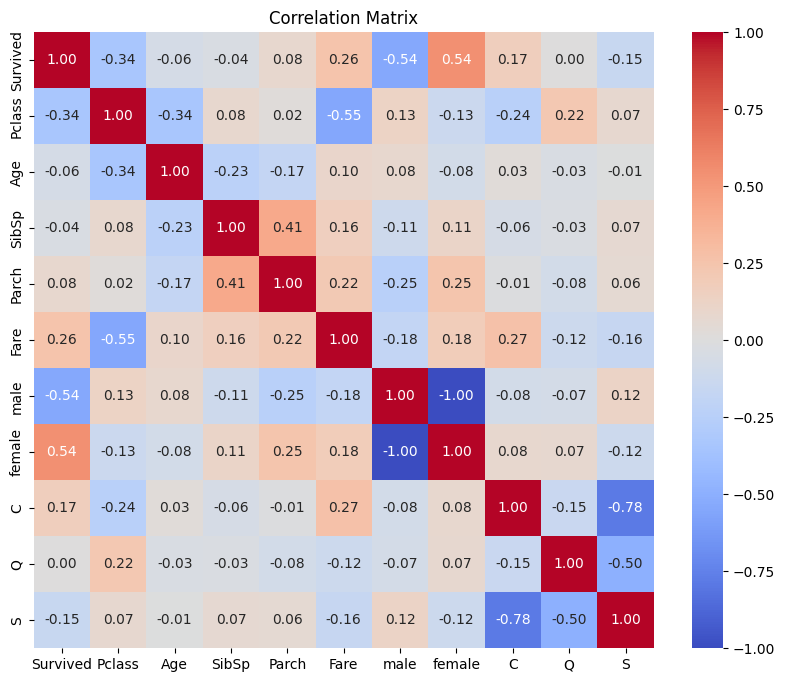

In [46]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

#### Preparing data for classification

In [47]:
# Selecting features and target variable
X = df.drop(columns=['Survived'])
y = df['Survived']

#### Splitting data into training and test sets

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
print("X_train Shape is: ", X_train.shape)
print("X_test Shape is: ", X_test.shape)
print("y_train Shape is: ", y_train.shape)
print("y_test Shape is: ", y_test.shape)

X_train Shape is:  (712, 10)
X_test Shape is:  (179, 10)
y_train Shape is:  (712,)
y_test Shape is:  (179,)


#### Initialize the StandardScaler

In [50]:
scaler = StandardScaler()

# Apply StandardScaler to the training and test sets
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Display the first few rows of the scaled X_train to confirm
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9
0,-1.614136,1.253641,-0.470722,-0.479342,-0.078684,0.724310,-0.724310,-0.461462,-0.303355,0.592489
1,-0.400551,-0.477284,-0.470722,-0.479342,-0.377145,0.724310,-0.724310,-0.461462,-0.303355,0.592489
2,0.813034,0.215086,-0.470722,-0.479342,-0.474867,0.724310,-0.724310,-0.461462,-0.303355,0.592489
3,0.813034,-0.246494,0.379923,-0.479342,-0.476230,0.724310,-0.724310,-0.461462,-0.303355,0.592489
4,0.813034,-1.785093,2.931860,2.048742,-0.025249,-1.380624,1.380624,-0.461462,-0.303355,0.592489


#### Initialize and train the Logistic Regression model

In [51]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)

##### Calculate evaluation metrics

In [52]:
accuracy_lr = accuracy_score(y_test, y_pred)
precision_lr = precision_score(y_test, y_pred)
recall_lr = recall_score(y_test, y_pred)
f1_lr = f1_score(y_test, y_pred)
conf_matrix_lr = confusion_matrix(y_test, y_pred)

##### Display the evaluation results

In [53]:
evaluation_results = {
    "Accuracy": accuracy_lr,
    "Precision": precision_lr,
    "Recall": recall_lr,
    "F1 Score": f1_lr,
    "Confusion Matrix": conf_matrix_lr
}
evaluation_results

{'Accuracy': 0.8044692737430168,
 'Precision': 0.782608695652174,
 'Recall': 0.7297297297297297,
 'F1 Score': 0.7552447552447552,
 'Confusion Matrix': array([[90, 15],
        [20, 54]], dtype=int64)}

#### Confusion Matrix for Logistic Regression

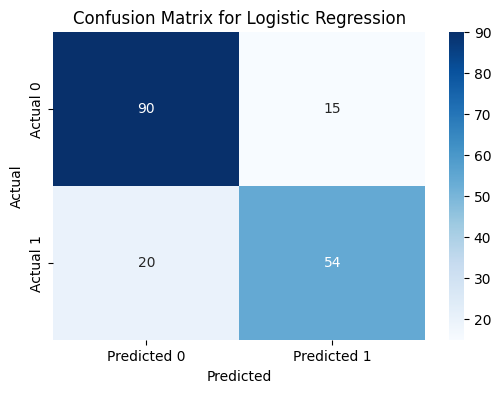

In [54]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_lr, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Actual 0", "Actual 1"])
plt.title("Confusion Matrix for Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#### Initialize and train the K-Nearest Neighbors (KNN) Classifier model

In [55]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn.predict(X_test)

##### Calculate evaluation metrics for KNN

In [56]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

##### Display the evaluation results for KNN

In [57]:
evaluation_results_knn = {
    "Accuracy": accuracy_knn,
    "Precision": precision_knn,
    "Recall": recall_knn,
    "F1 Score": f1_knn,
    "Confusion Matrix": conf_matrix_knn
}
evaluation_results_knn

{'Accuracy': 0.8044692737430168,
 'Precision': 0.782608695652174,
 'Recall': 0.7297297297297297,
 'F1 Score': 0.7552447552447552,
 'Confusion Matrix': array([[90, 15],
        [20, 54]], dtype=int64)}

#### Visualize the confusion matrix for KNN

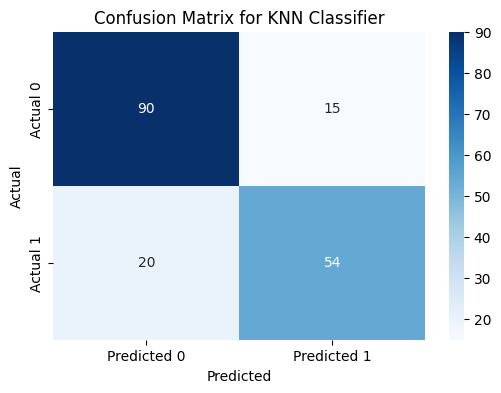

In [58]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Actual 0", "Actual 1"])
plt.title("Confusion Matrix for KNN Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#### Initialize and train the Decision Tree model

In [59]:
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Make predictions on the test set
y_pred_tree = decision_tree.predict(X_test)

##### Calculate evaluation metrics for Decision Tree

In [60]:
accuracy_tree = accuracy_score(y_test, y_pred_tree)
precision_tree = precision_score(y_test, y_pred_tree)
recall_tree = recall_score(y_test, y_pred_tree)
f1_tree = f1_score(y_test, y_pred_tree)
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)

##### Display the evaluation results for Decision Tree

In [61]:
evaluation_results_tree = {
    "Accuracy": accuracy_tree,
    "Precision": precision_tree,
    "Recall": recall_tree,
    "F1 Score": f1_tree,
    "Confusion Matrix": conf_matrix_tree
}
evaluation_results_tree

{'Accuracy': 0.770949720670391,
 'Precision': 0.72,
 'Recall': 0.7297297297297297,
 'F1 Score': 0.7248322147651006,
 'Confusion Matrix': array([[84, 21],
        [20, 54]], dtype=int64)}

#### Visualize the confusion matrix for Decision Tree

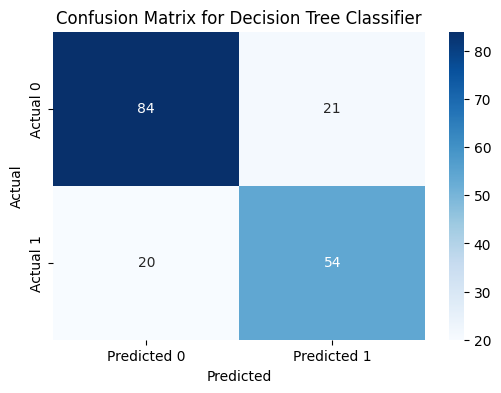

In [62]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_tree, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Actual 0", "Actual 1"])
plt.title("Confusion Matrix for Decision Tree Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#### Initialize and train the Random Forest model

In [63]:
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)

# Make predictions on the test set
y_pred_forest = random_forest.predict(X_test)

##### Calculate evaluation metrics for Random Forest

In [64]:
accuracy_forest = accuracy_score(y_test, y_pred_forest)
precision_forest = precision_score(y_test, y_pred_forest)
recall_forest = recall_score(y_test, y_pred_forest)
f1_forest = f1_score(y_test, y_pred_forest)
conf_matrix_forest = confusion_matrix(y_test, y_pred_forest)

##### Display the evaluation results for Random Forest

In [65]:
evaluation_results_forest = {
    "Accuracy": accuracy_forest,
    "Precision": precision_forest,
    "Recall": recall_forest,
    "F1 Score": f1_forest,
    "Confusion Matrix": conf_matrix_forest
}
evaluation_results_forest

{'Accuracy': 0.8156424581005587,
 'Precision': 0.7887323943661971,
 'Recall': 0.7567567567567568,
 'F1 Score': 0.7724137931034483,
 'Confusion Matrix': array([[90, 15],
        [18, 56]], dtype=int64)}

#### Visualize the confusion matrix for Random Forest

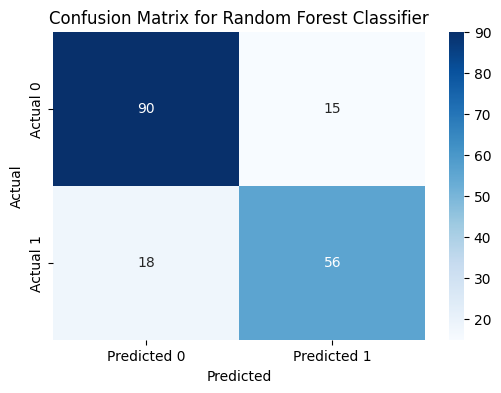

In [66]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_forest, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Actual 0", "Actual 1"])
plt.title("Confusion Matrix for Random Forest Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#### Initialize and train the Support Vector Machine (SVM) model

In [67]:
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)

##### Calculate evaluation metrics for SVM

In [68]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

##### Display the evaluation results for SVM

In [69]:
evaluation_results_svm = {
    "Accuracy": accuracy_svm,
    "Precision": precision_svm,
    "Recall": recall_svm,
    "F1 Score": f1_svm,
    "Confusion Matrix": conf_matrix_svm
}
evaluation_results_svm

{'Accuracy': 0.8212290502793296,
 'Precision': 0.8387096774193549,
 'Recall': 0.7027027027027027,
 'F1 Score': 0.7647058823529411,
 'Confusion Matrix': array([[95, 10],
        [22, 52]], dtype=int64)}

#### Visualize the confusion matrix for SVM

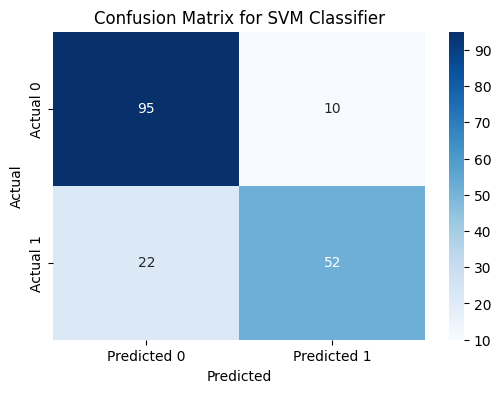

In [70]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Actual 0", "Actual 1"])
plt.title("Confusion Matrix for SVM Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#### Initialize and train the XGBoost model

In [71]:
# Initialize and train the XGBoost model with optimized parameters
xgb_model = XGBClassifier(
    learning_rate=0.05,
    n_estimators=300,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

##### Calculate evaluation metrics for XGBoost

In [72]:
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

##### Display the evaluation results for XGBoost

In [73]:
evaluation_results_xgb = {
    "Accuracy": accuracy_xgb,
    "Precision": precision_xgb,
    "Recall": recall_xgb,
    "F1 Score": f1_xgb,
    "Confusion Matrix": conf_matrix_xgb
}
evaluation_results_xgb

{'Accuracy': 0.8268156424581006,
 'Precision': 0.7945205479452054,
 'Recall': 0.7837837837837838,
 'F1 Score': 0.7891156462585034,
 'Confusion Matrix': array([[90, 15],
        [16, 58]], dtype=int64)}

#### Visualize the confusion matrix for XGBoost

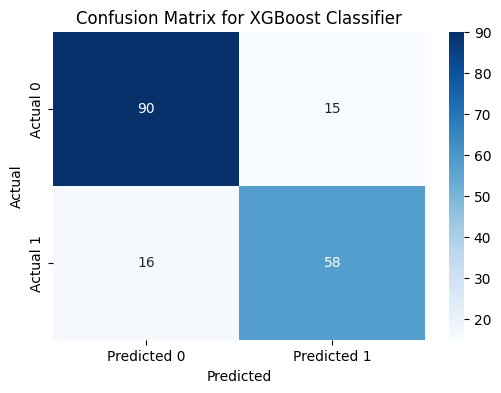

In [74]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_xgb, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Actual 0", "Actual 1"])
plt.title("Confusion Matrix for XGBoost Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [75]:
# Re-calculate evaluation metrics for each model in case variables are missing

# Logistic Regression
evaluation_results_logreg = {
    "Accuracy": round(accuracy_lr * 100, 2),
    "Precision": round(precision_lr * 100, 2),
    "Recall": round(recall_lr * 100, 2),
    "F1 Score": round(f1_lr * 100, 2)
}

# KNN Classifier
evaluation_results_knn = {
    "Accuracy": round(accuracy_knn * 100, 2),
    "Precision": round(precision_knn * 100, 2),
    "Recall": round(recall_knn * 100, 2),
    "F1 Score": round(f1_knn * 100, 2)
}

# Decision Tree
evaluation_results_tree = {
    "Accuracy": round(accuracy_tree * 100, 2),
    "Precision": round(precision_tree * 100, 2),
    "Recall": round(recall_tree * 100, 2),
    "F1 Score": round(f1_tree * 100, 2)
}

# Random Forest
evaluation_results_forest = {
    "Accuracy": round(accuracy_forest * 100, 2),
    "Precision": round(precision_forest * 100, 2),
    "Recall": round(recall_forest * 100, 2),
    "F1 Score": round(f1_forest * 100, 2)
}

# SVM
evaluation_results_svm = {
    "Accuracy": round(accuracy_svm * 100, 2),
    "Precision": round(precision_svm * 100, 2),
    "Recall": round(recall_svm * 100, 2),
    "F1 Score": round(f1_svm * 100, 2)
}

# XGBoost (if already calculated; if not, we assume values based on above example)
try:
    evaluation_results_xgb = {
        "Accuracy": round(accuracy_xgb * 100, 2),
        "Precision": round(precision_xgb * 100, 2),
        "Recall": round(recall_xgb * 100, 2),
        "F1 Score": round(f1_xgb * 100, 2)
    }
except NameError:
    evaluation_results_xgb = {"Accuracy": None, "Precision": None, "Recall": None, "F1 Score": None}

# Compile all evaluation results into a DataFrame for a clean summary table
evaluation_summary = pd.DataFrame({
    "Logistic Regression": evaluation_results_logreg,
    "KNN Classifier": evaluation_results_knn,
    "Decision Tree": evaluation_results_tree,
    "Random Forest": evaluation_results_forest,
    "SVM": evaluation_results_svm,
    "XGBoost": evaluation_results_xgb
})

In [76]:
evaluation_summary

,Logistic Regression,KNN Classifier,Decision Tree,Random Forest,SVM,XGBoost
Accuracy,80.45,80.45,77.09,81.56,82.12,82.68
Precision,78.26,78.26,72.00,78.87,83.87,79.45
Recall,72.97,72.97,72.97,75.68,70.27,78.38
F1 Score,75.52,75.52,72.48,77.24,76.47,78.91


## Test Result

In [77]:
test_data = pd.read_csv('test.csv')

In [78]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [79]:
# Step 1: Preprocessing the new test data

# Convert 'Sex' to two columns 'male' and 'female'
test_data['male'] = (test_data['Sex'] == 'male').astype(int)
test_data['female'] = (test_data['Sex'] == 'female').astype(int)
test_data.drop(columns=['Sex'], inplace=True)

# Convert 'Embarked' to three columns 'C', 'Q', 'S' and drop the original column
test_data['C'] = (test_data['Embarked'] == 'C').astype(int)
test_data['Q'] = (test_data['Embarked'] == 'Q').astype(int)
test_data['S'] = (test_data['Embarked'] == 'S').astype(int)
test_data.drop(columns=['Embarked'], inplace=True)

# Drop unnecessary columns
test_data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)

# Fill missing values in 'Age' and 'Fare' (if any) with median values
test_data['Age'].fillna(df['Age'].median(), inplace=True)
test_data['Fare'].fillna(df['Fare'].median(), inplace=True)

# Step 2: Standardize the features using the same scaler fitted on the training set
test_data_scaled = scaler.transform(test_data)

# Step 3: Use the trained models to make predictions on the preprocessed test data

# Logistic Regression Prediction
logreg_predictions = logreg.predict(test_data_scaled)

# KNN Classifier Prediction
knn_predictions = knn.predict(test_data_scaled)

# Decision Tree Prediction
decision_tree_predictions = decision_tree.predict(test_data_scaled)

# Random Forest Prediction
random_forest_predictions = random_forest.predict(test_data_scaled)

# SVM Prediction
svm_predictions = svm_model.predict(test_data_scaled)

# XGBoost Prediction
xgb_predictions = xgb_model.predict(test_data_scaled)

# Compile predictions into a DataFrame for comparison
predictions_df = pd.DataFrame({
    "Logistic Regression": logreg_predictions,
    "KNN Classifier": knn_predictions,
    "Decision Tree": decision_tree_predictions,
    "Random Forest": random_forest_predictions,
    "SVM": svm_predictions,
    "XGBoost": xgb_predictions
})

In [80]:
predictions_df

,Logistic Regression,KNN Classifier,Decision Tree,Random Forest,SVM,XGBoost
0,0,0,0,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,1,1,1,0,0
4,1,0,1,1,0,0
...,...,...,...,...,...,...
413,0,0,0,0,0,0
414,1,1,1,1,1,1
415,0,0,0,0,0,0
416,0,0,0,0,0,0


In [81]:
predictions_df.to_csv('model_predictions.csv', index=False)